In [ ]:
!pip install pandas matplotlib seaborn textblob


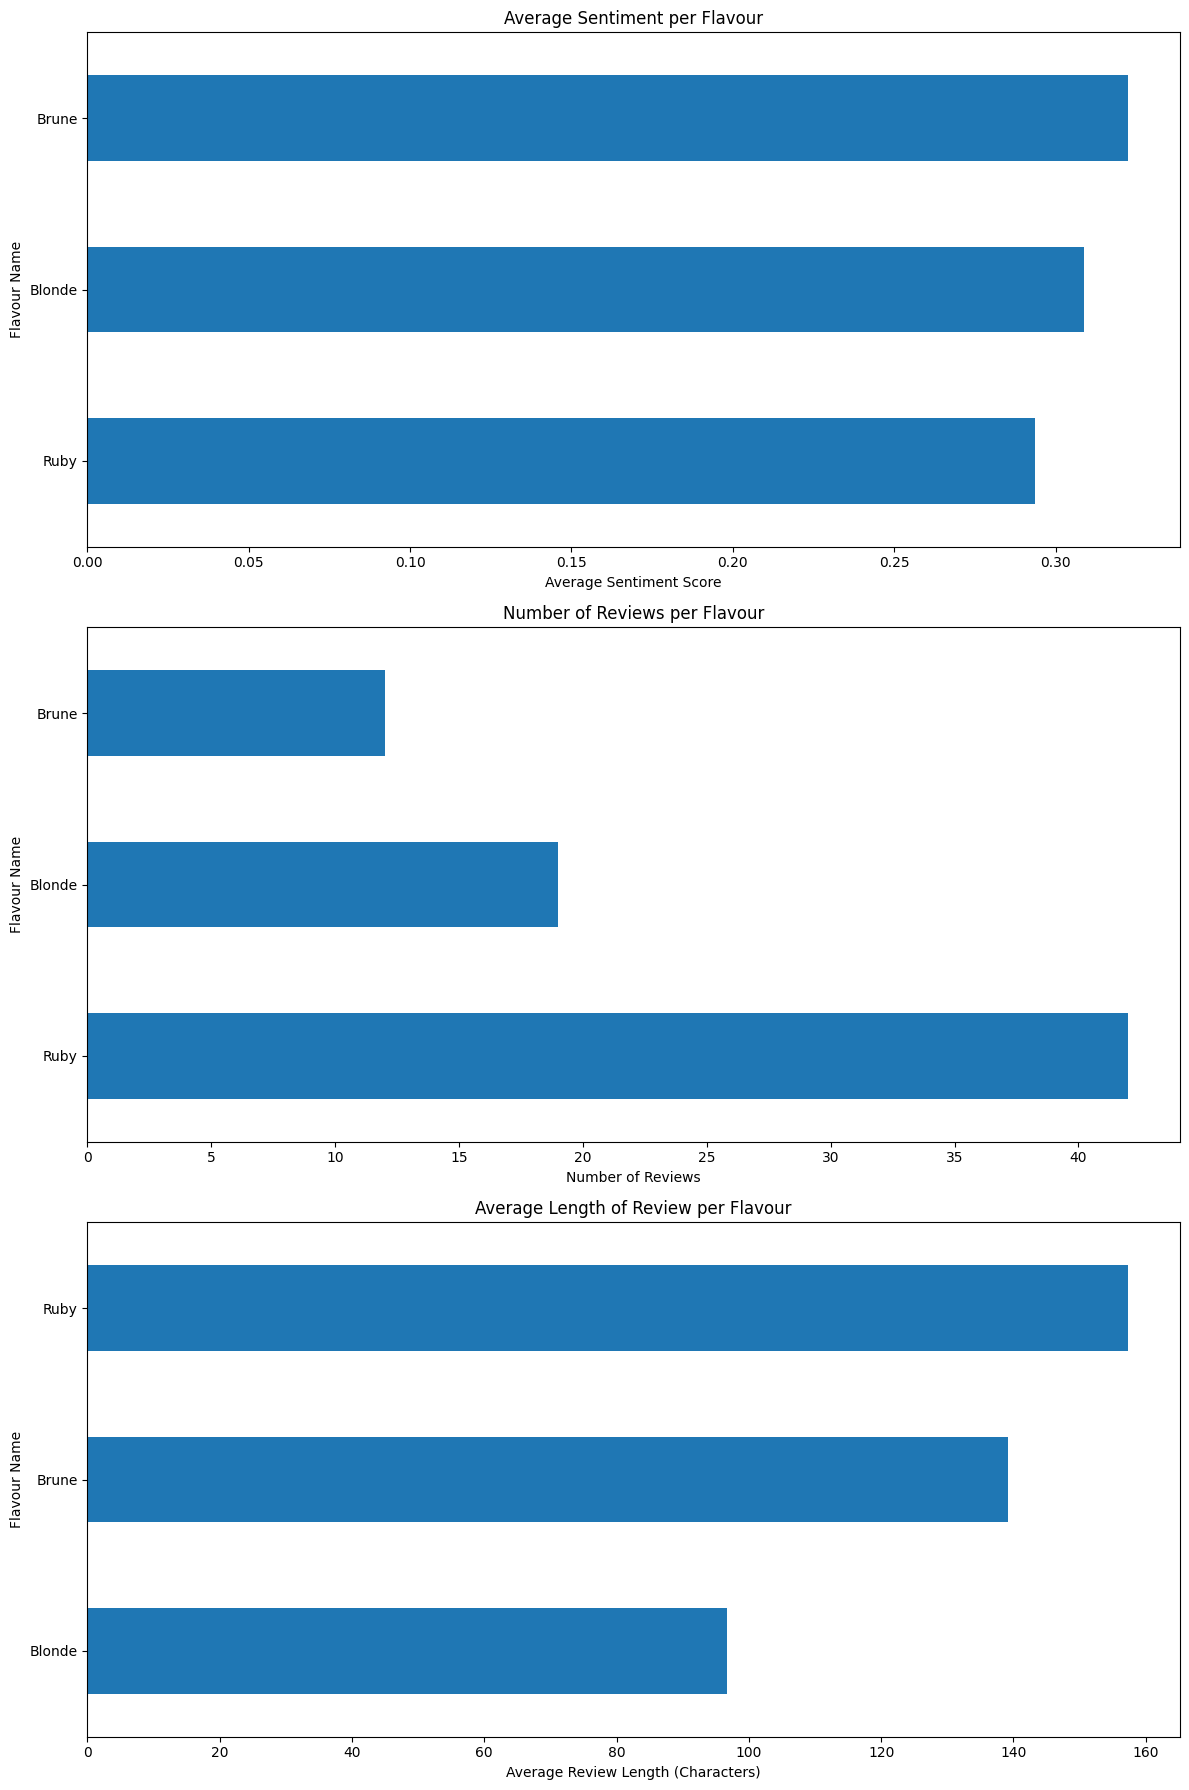

In [ ]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/Dataset3.xlsx'


new_dataset = pd.read_excel(file_path)

#  here i am doing Sentiment Analysis
new_dataset['Sentiment'] = new_dataset['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Grouping by flavour for sentiment analysis
flavour_sentiment = new_dataset.groupby('Flavour Name')['Sentiment'].mean()

# Counting the number of reviews per flavour
flavour_review_count = new_dataset['Flavour Name'].value_counts()

# Calculating the average length of review per flavour
new_dataset['Review Length'] = new_dataset['Review'].str.len()
flavour_review_length = new_dataset.groupby('Flavour Name')['Review Length'].mean()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# for sentiment per Flavour
flavour_sentiment.sort_values().plot(kind='barh', ax=axes[0])
axes[0].set_title('Average Sentiment per Flavour')
axes[0].set_xlabel('Average Sentiment Score')
axes[0].set_ylabel('Flavour Name')

# Number of Reviews per Flavour
flavour_review_count.plot(kind='barh', ax=axes[1])
axes[1].set_title('Number of Reviews per Flavour')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Flavour Name')

# Length of Review per Flavour
flavour_review_length.sort_values().plot(kind='barh', ax=axes[2])
axes[2].set_title('Average Length of Review per Flavour')
axes[2].set_xlabel('Average Review Length (Characters)')
axes[2].set_ylabel('Flavour Name')

plt.tight_layout()
plt.show()
